In [171]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]
%matplotlib inline

In [172]:
#Parsing date column of both datasets to be read by python

pdata = pd.read_csv('pollution-1.csv',parse_dates=['ReadingDateTime'])
wdata = pd.read_csv('weather-1.csv',parse_dates=['DATE'])

In [173]:
#Extracting numerical values of dew point, temperature, wind speed (converting from mps to kmph) and direction

wdata['DEW'] = wdata['DEW'].str[:-2].astype(np.float64)/10
wdata['TMP'] = wdata['TMP'].str[:-2].astype(np.float64)/10
wdata['DIR'] = wdata['WND'].str[:3].astype(np.float64)
wdata['SPD'] = (wdata['WND'].str[8:-2].astype(np.float64)/10)*3.6

#Calculating relative humidity from dew point and temperature

wdata['HUM'] = 100*(np.exp((17.625 * wdata['DEW'])/(243.04 + wdata['DEW']))/np.exp((17.625 * wdata['TMP'])/(243.04 + wdata['TMP'])))

In [174]:
#Downsampling the weather dataset

wdata.index=wdata['DATE']
wdata_resampled = wdata.resample('1H').mean()[:17520]
wdata = wdata_resampled.reset_index()

In [175]:
#Joining the weather and pollution datasets

data = pd.concat([wdata['DATE'], wdata['DEW'],wdata['TMP'],wdata['DIR'],wdata['SPD'],wdata['HUM'],pdata.Value[pdata.Species=='NO2'].reset_index(drop=True).rename('NO2'),pdata.Value[(pdata.Species=='O3')].reset_index(drop=True).rename('O3'),pdata.Value[(pdata.Species=='PM2.5')].reset_index(drop=True).rename('PM25')], axis=1)

In [176]:
# Adding time shifted features
## This is done before removing outliers and nulls so that the dataset is continuous
### To be cleaned up into a function

data['DEW_1'] = data.DEW.shift(periods=1)
data['TMP_1'] = data.TMP.shift(periods=1)
data['DIR_1'] = data.DIR.shift(periods=1)
data['SPD_1'] = data.SPD.shift(periods=1)
data['HUM_1'] = data.HUM.shift(periods=1)
data['NO2_1'] = data.NO2.shift(periods=1)
data['O3_1'] = data.NO2.shift(periods=1)
data['PM25_1'] = data.NO2.shift(periods=1)

data['DEW_2'] = data.DEW.shift(periods=2)
data['TMP_2'] = data.TMP.shift(periods=2)
data['DIR_2'] = data.DIR.shift(periods=2)
data['HUM_4'] = data.HUM.shift(periods=2)
data['SPD_2'] = data.SPD.shift(periods=2)
data['NO2_2'] = data.NO2.shift(periods=2)
data['O3_2'] = data.NO2.shift(periods=2)
data['PM25_2'] = data.NO2.shift(periods=2)

data['DEW_3'] = data.DEW.shift(periods=3)
data['TMP_3'] = data.TMP.shift(periods=3)
data['DIR_3'] = data.DIR.shift(periods=3)
data['HUM_4'] = data.HUM.shift(periods=3)
data['SPD_3'] = data.SPD.shift(periods=3)
data['NO2_3'] = data.NO2.shift(periods=3)
data['O3_3'] = data.NO2.shift(periods=3)
data['PM25_3'] = data.NO2.shift(periods=3)

data['DEW_4'] = data.DEW.shift(periods=4)
data['TMP_4'] = data.TMP.shift(periods=4)
data['DIR_4'] = data.DIR.shift(periods=4)
data['HUM_4'] = data.HUM.shift(periods=4)
data['SPD_4'] = data.SPD.shift(periods=4)
data['NO2_4'] = data.NO2.shift(periods=4)
data['O3_4'] = data.NO2.shift(periods=4)
data['PM25_4'] = data.NO2.shift(periods=4)

data['DEW_5'] = data.DEW.shift(periods=5)
data['TMP_5'] = data.TMP.shift(periods=5)
data['DIR_5'] = data.DIR.shift(periods=5)
data['HUM_5'] = data.HUM.shift(periods=5)
data['SPD_5'] = data.SPD.shift(periods=5)
data['NO2_5'] = data.NO2.shift(periods=5)
data['O3_5'] = data.NO2.shift(periods=5)
data['PM25_5'] = data.NO2.shift(periods=5)

In [177]:
#Function to plot time series
#Need to modify it to take a value as an argument

def time_series(start, end):
    time_series_df = data[['DATE', 'PM25']][(data['DATE'] >= start) & (data['DATE'] <= end)]
    x = time_series_df.DATE
    y = time_series_df.PM25
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show();
#time_series('2017','2019')

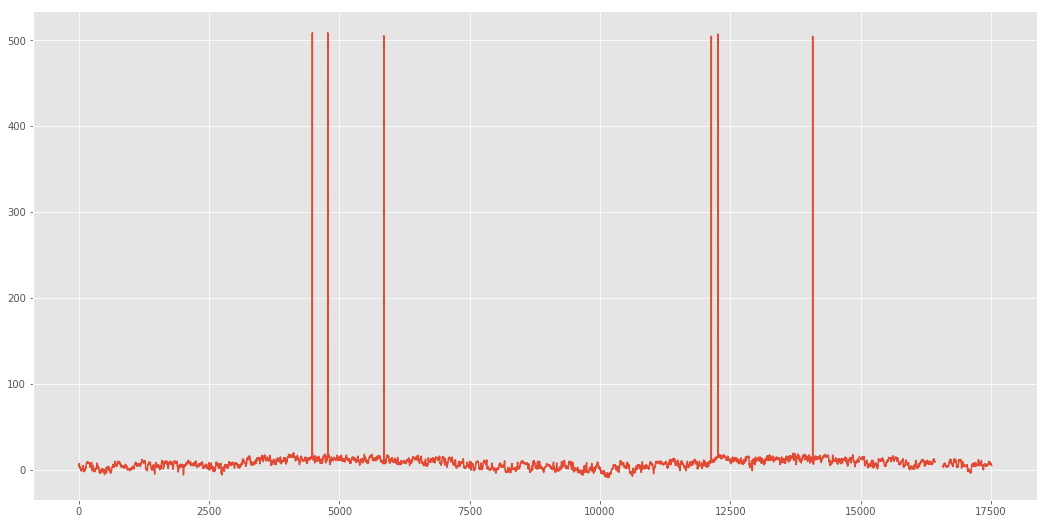

In [178]:
data['DEW'].plot(figsize=(18,9))

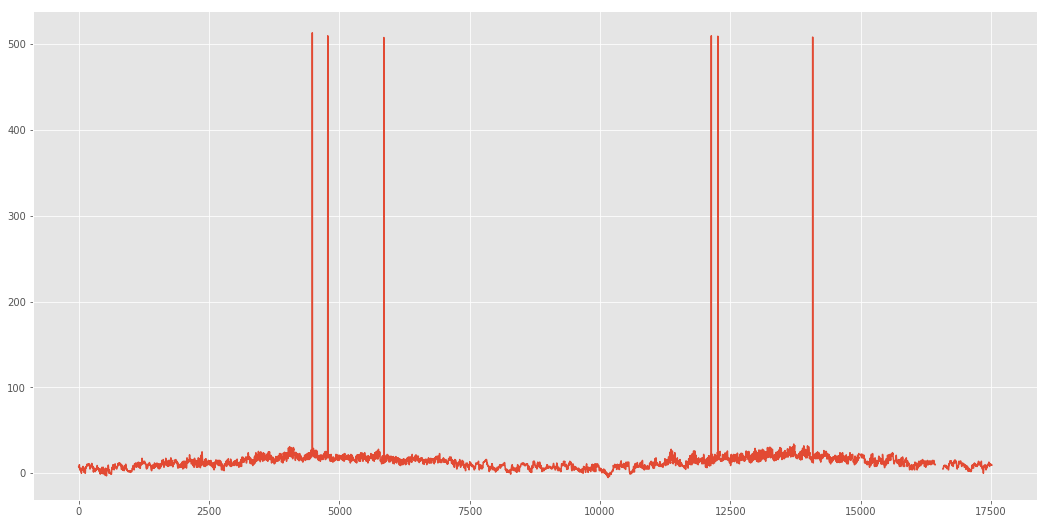

In [179]:
data['TMP'].plot(figsize=(18,9))

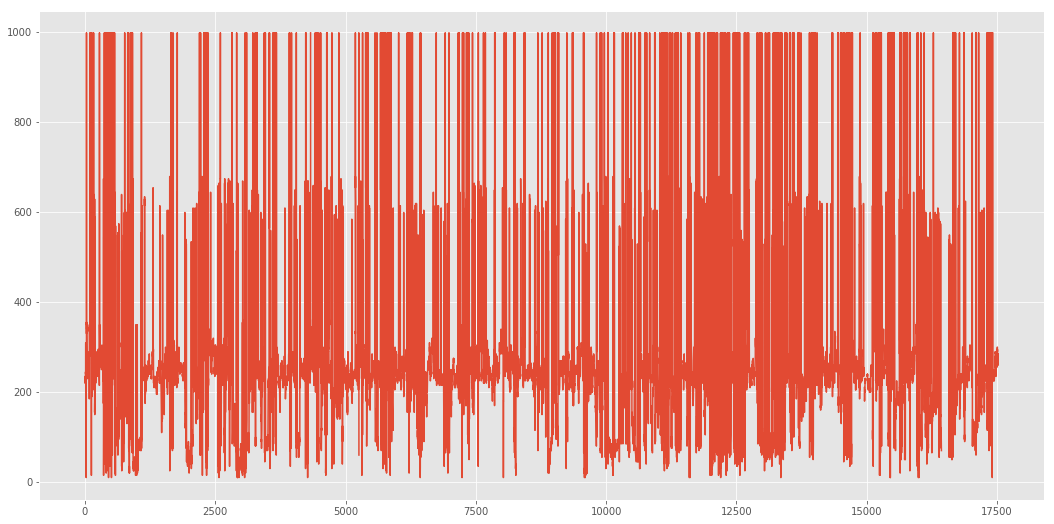

In [180]:
data['DIR'].plot(figsize=(18,9))

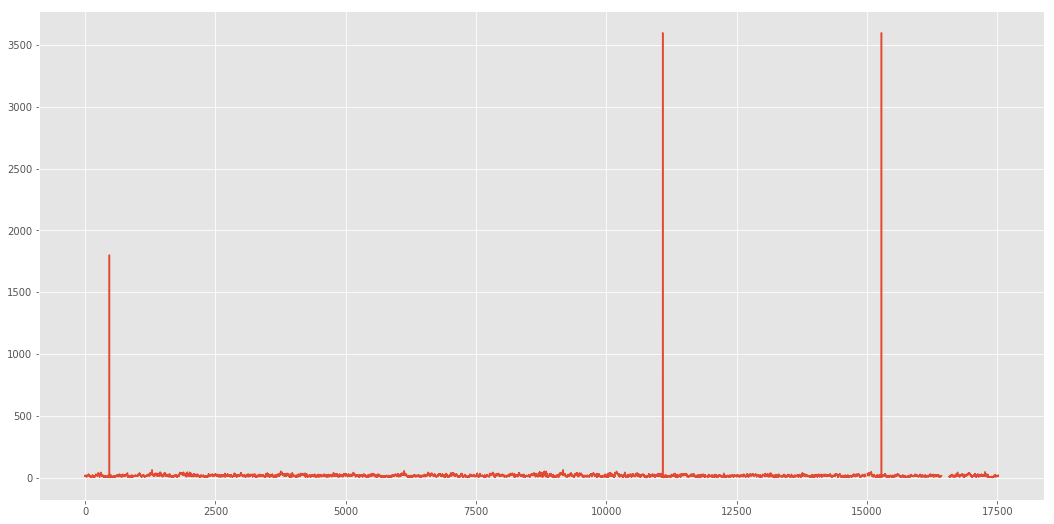

In [181]:
data['SPD'].plot(figsize=(18,9))

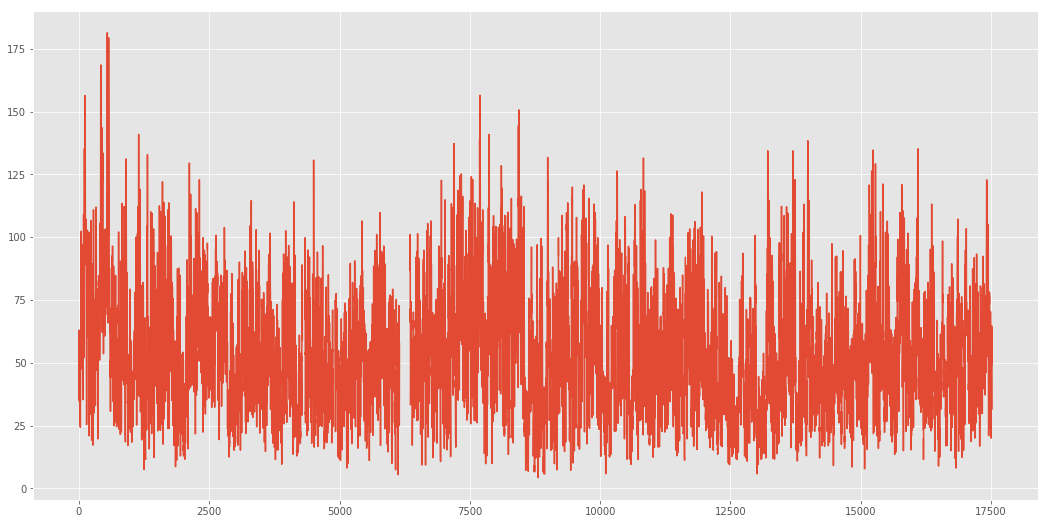

In [182]:
data['NO2'].plot(figsize=(18,9))

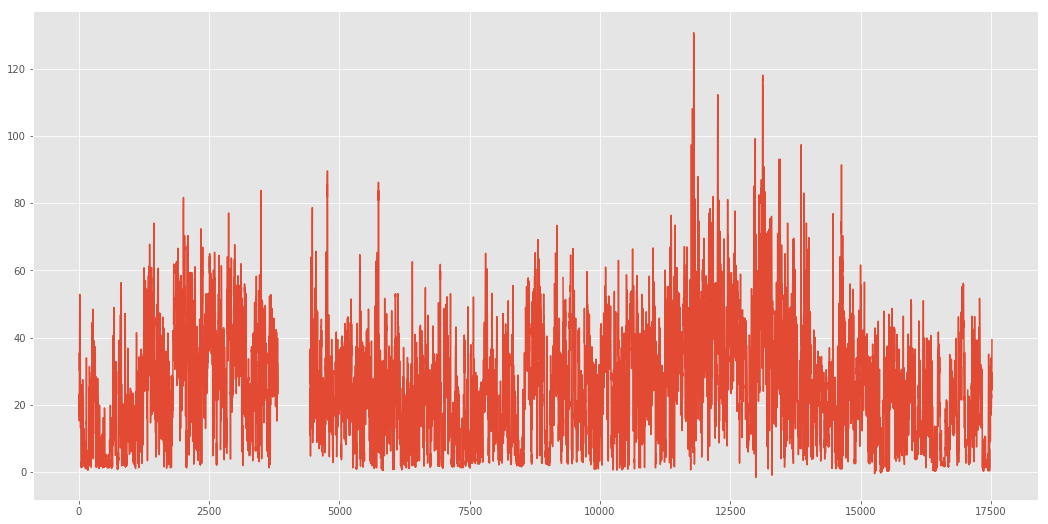

In [183]:
data['O3'].plot(figsize=(18,9))

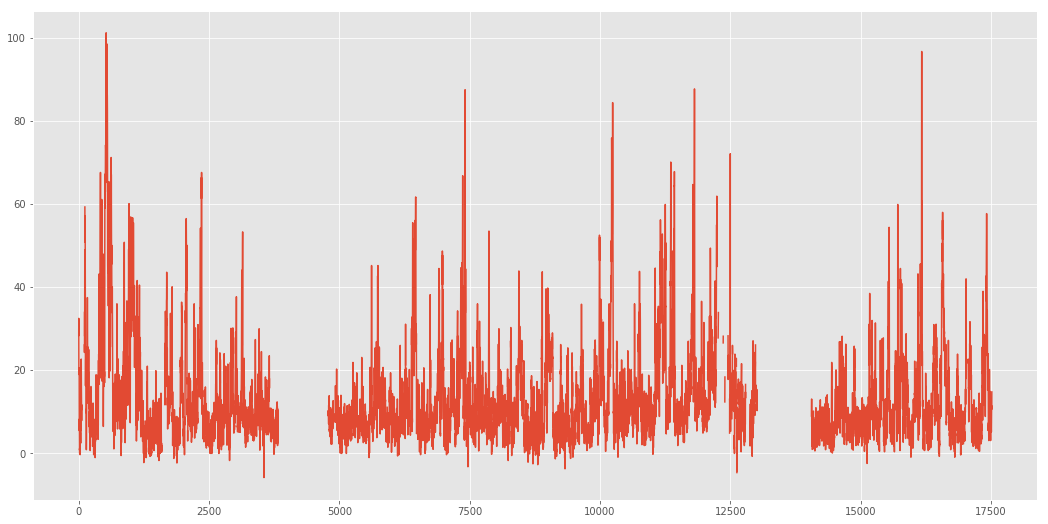

In [184]:
data['PM25'].plot(figsize=(18,9))

In [185]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# Thresholds


| Species 	| Min   	| Max  	|
|---------	|-------	|------	|
| DEW     	| -98.2 	| 36.8 	|
| TMP     	| -93.2 	| 61.8 	|
| DIR     	| 1     	| 360  	|
| SPD     	| 0     	| 324  	|
| HUM     	| 0     	| 100  	|
| NO2     	| 0     	| 601  	|
| O3      	| 0     	| 241  	|
| PM25    	| 0     	| 71   	|

In [186]:
#Max and min values before removing outliers

minmax = {'Species': ['DEW', 'TMP', 'DIR', 'SPD', 'HUM','NO2','O3','PM25'], 
        'Min': [data['DEW'].min(), data['TMP'].min(),data['DIR'].min(),data['SPD'].min(),data['HUM'].min(),data['NO2'].min(),data['O3'].min(),data['PM25'].min()], 
        'Max': [data['DEW'].max(), data['TMP'].max(),data['DIR'].max(),data['SPD'].max(),data['HUM'].max(),data['NO2'].max(),data['O3'].max(),data['PM25'].max()]}
minmaxdf = pd.DataFrame(minmax, columns = ['Species', 'Min', 'Max'])
minmaxdf

,Species,Min,Max
0,DEW,-9.000000,508.95000
1,TMP,-5.000000,513.45000
2,DIR,10.000000,999.00000
3,SPD,0.000000,3599.64000
4,HUM,21.789608,100.00000
5,NO2,4.300000,181.39999
6,O3,-1.600000,130.70000
7,PM25,-5.800000,101.20000


In [187]:
#Number of outilers
#Need to check if there was an error in extracting wind direction due to huge number of outliers

print('DEW:',((data['DEW'] <= -99) | (data['DEW'] >= 37)).sum())

print('TMP:',((data['TMP'] <= -94) | (data['TMP'] >= 62)).sum())

print('DIR:',((data['DIR'] < 1) | (data['DIR'] > 360)).sum())

print('SPD:',((data['SPD'] < 0) | (data['SPD'] > 324)).sum())

print('HUM:',((data['HUM'] < 0) | (data['HUM'] > 100)).sum())

print('NO2:',((data['NO2'] < 0) | (data['NO2'] > 601)).sum())

print('O3:',((data['O3'] < 0) | (data['O3'] > 241)).sum())

print('PM25:',((data['PM25'] < 0) | (data['PM25'] > 71)).sum())

DEW: 9
TMP: 9
DIR: 2347
SPD: 10
HUM: 0
NO2: 0
O3: 9
PM25: 128


In [170]:
#Removing outliers
#need to write code to replace outliers with nulls

In [ ]:
#Number of null values in the dataset

data.isna().sum()

In [ ]:
#Percentage of null values in final dataset

data.isna().mean().round(4) * 100

In [8]:
#dropping all null values

data_dropped=data[data['DEW'].notna() & data['TMP'].notna() & data['DIR'].notna() & data['SPD'].notna() & data['NO2'].notna() & data['O3'].notna() & data['PM25'].notna()]

In [ ]:
#Number of null values after dropping

data_dropped.isna().sum()

In [ ]:
#Percentage of null values after dropping

data_dropped.isna().mean().round(4) * 100